In [1]:
import numpy as np
import pandas as pd
import haversine
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fn = "../input/deped_school_location_with_enrolment_2017_2018_consolidated.csv"
df = pd.read_csv(fn)

In [2]:
fn_out = "../output/nn5_ALBAY.csv"

In [3]:
len(df)

47358

In [4]:
df.head(2)

,SCHOOL ID,SCHOOL NAME,DIVISION,ADDRESS,DEPED_BARANGAY,DEPED_MUNICIPALITY,DEPED_REGION,DEPED_COORD,DEPED_LONGITUDE,DEPED_LATITUDE,...,LATITUDE,PSGC_BARANGAY,BARANGAY,PSGC_MUNICIPALITY,MUNICIPALITY,PSGC_PROVINCE,PROVINCE,PSGC_REGION,REGION,DELTA_KM
0,100160,ADAMS CES,ILOCOS NORTE,"POB. 1, ADAMS, ILOCOS NORTE",ADAMS (POB.),ADAMS,REGION I,1,120.901845,18.462302,...,18.462302,PH012801001,ADAMS (POB.),PH012801000,ADAMS,PH012800000,ILOCOS NORTE,PH010000000,REGION I (ILOCOS REGION),NaN
1,100163,BUCAROT PS,ILOCOS NORTE,"BUCAROT, ADAMS, ILOCOS NORTE",ADAMS (POB.),ADAMS,REGION I,1,120.903605,18.462088,...,18.462088,PH012801001,ADAMS (POB.),PH012801000,ADAMS,PH012800000,ILOCOS NORTE,PH010000000,REGION I (ILOCOS REGION),NaN


In [7]:
df1 = df[df["SOURCE_COORD"].notnull()]
df2 = df[df["SOURCE_COORD"]=="DEPED"]
len(df1), len(df2)

(45333, 41712)

In [9]:
df_sub1 = df1[df1["PROVINCE"]=="ALBAY"]
len(df_sub1)

722

In [25]:
df_sub.head(2)

,index,SCHOOL ID,SCHOOL NAME,DIVISION,ADDRESS,DEPED_BARANGAY,DEPED_MUNICIPALITY,DEPED_REGION,DEPED_COORD,DEPED_LONGITUDE,...,LATITUDE,PSGC_BARANGAY,BARANGAY,PSGC_MUNICIPALITY,MUNICIPALITY,PSGC_PROVINCE,PROVINCE,PSGC_REGION,REGION,DELTA_KM
0,14964,111601,BANAO ELEMENTARY SCHOOL,ALBAY,PUROK 1,BANAO,BACACAY,REGION V,1,123.815365,...,13.255574,PH050501002,BANAO,PH050501000,BACACAY,PH050500000,ALBAY,PH050000000,REGION V (BICOL REGION),NaN
1,14965,111585,BASUD ELEMENTARY SCHOOL,ALBAY,-,BASUD,BACACAY,REGION V,1,123.793570,...,13.281382,PH050501001,BACLAYON,PH050501000,BACACAY,PH050500000,ALBAY,PH050000000,REGION V (BICOL REGION),NaN


In [14]:
lon, lat = np.array(df_sub1["LONGITUDE"]), np.array(df_sub1["LATITUDE"])

In [32]:
jnn

array([ 30,  31, 514, 513,  42])

In [43]:
df_sub = df_sub1.copy().reset_index()
nsub = len(df_sub)

# initialize output dataframe
df_out = pd.DataFrame()
cols = ["SCHOOL ID", "SOURCE_COORD", "LONGITUDE", "LATITUDE", "ID1", "ID2", "ID3", "ID4", "ID5", "D1", "D2", "D3", "D4", "D5"]
for col in cols:
    df_out[col] = np.zeros(nsub)

for i in np.arange(nsub):
    school_id = df_sub.loc[i, "SCHOOL ID"]
    source_coord = df_sub.loc[i, "SOURCE_COORD"]
    di = np.zeros(nsub) + np.nan # initialize array for distances to other schools
    lon1, lat1 = lon[i], lat[i]
    for j in np.arange(nsub):    
        lon2, lat2 = lon[j], lat[j]
        coord1, coord2 = (lon1, lat1), (lon2, lat2)
        dij = haversine.Haversine(coord1, coord2).km
        di[j] = dij
    # get nearest nn neighbors
    jsort = np.argsort(di)
    jnn = jsort[1:6]  # remove i=j
    idnn = df_sub.loc[jnn, "SCHOOL ID"].values
    dnn = di[jnn]
    out = np.array([school_id, source_coord, lon1, lat1, idnn[0], idnn[1], idnn[2], idnn[3], idnn[4], dnn[0], dnn[1], dnn[2], dnn[3], dnn[4]])
    df_out.loc[i,:] = out

In [44]:
df_out.to_csv(fn_out, index=False)

In [42]:
len(df_out)

722

In [3]:
df_out = pd.read_csv(fn_out)
df_out.head(2)

,SCHOOL ID,SOURCE_COORD,LONGITUDE,LATITUDE,ID1,ID2,ID3,ID4,ID5,D1,D2,D3,D4,D5
0,111601,DEPED,123.815365,13.255574,111618,301863,301815,112056,111622,1.375030,1.450677,1.808342,2.058832,2.345121
1,111585,DEPED,123.793570,13.281382,111624,111584,111603,111612,112462,0.442557,0.952464,1.196860,1.269868,1.284145


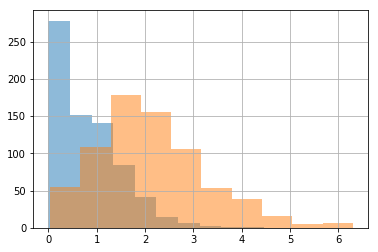

In [6]:
df_out["D1"].hist(alpha=0.6)
df_out["D5"].hist(alpha=0.6)

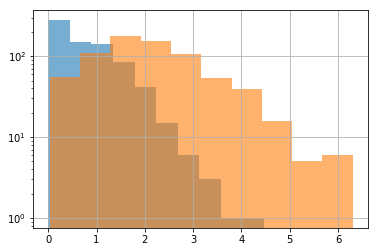

In [7]:
df_out["D1"].hist(alpha=0.6, log=True)
df_out["D5"].hist(alpha=0.6, log=True)

In [11]:
len(df_out[df_out["D1"]==0])

27

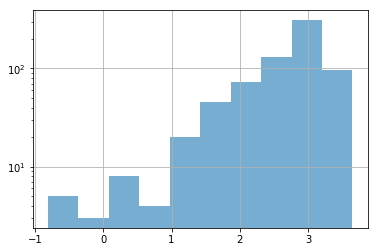

In [14]:
y = df_out["D1"]
logy = np.log10(y[y!=0])+3
logy.hist(alpha=0.6, log=True)

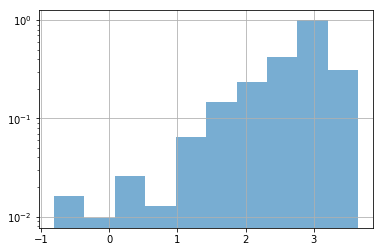

In [18]:
y = df_out["D1"]
logy = np.log10(y[y!=0])+3
logy.hist(alpha=0.6, log=True, density=True)